In [1]:
# !pip install pygraphviz
import networkx as nx
from myGAMDIVNorm import *
from mycolors import *
from avalia import *
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from networkx.algorithms import community
from networkx.generators.community import planted_partition_graph
from fcmeans import FCM

Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/felipe/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/felipe/anaconda3/lib/

In [2]:
G = nx.readwrite.edgelist.read_weighted_edgelist("/home/felipe/UFRJ/TCC/MVP/package1/binary_networks/network.dat",nodetype=int)

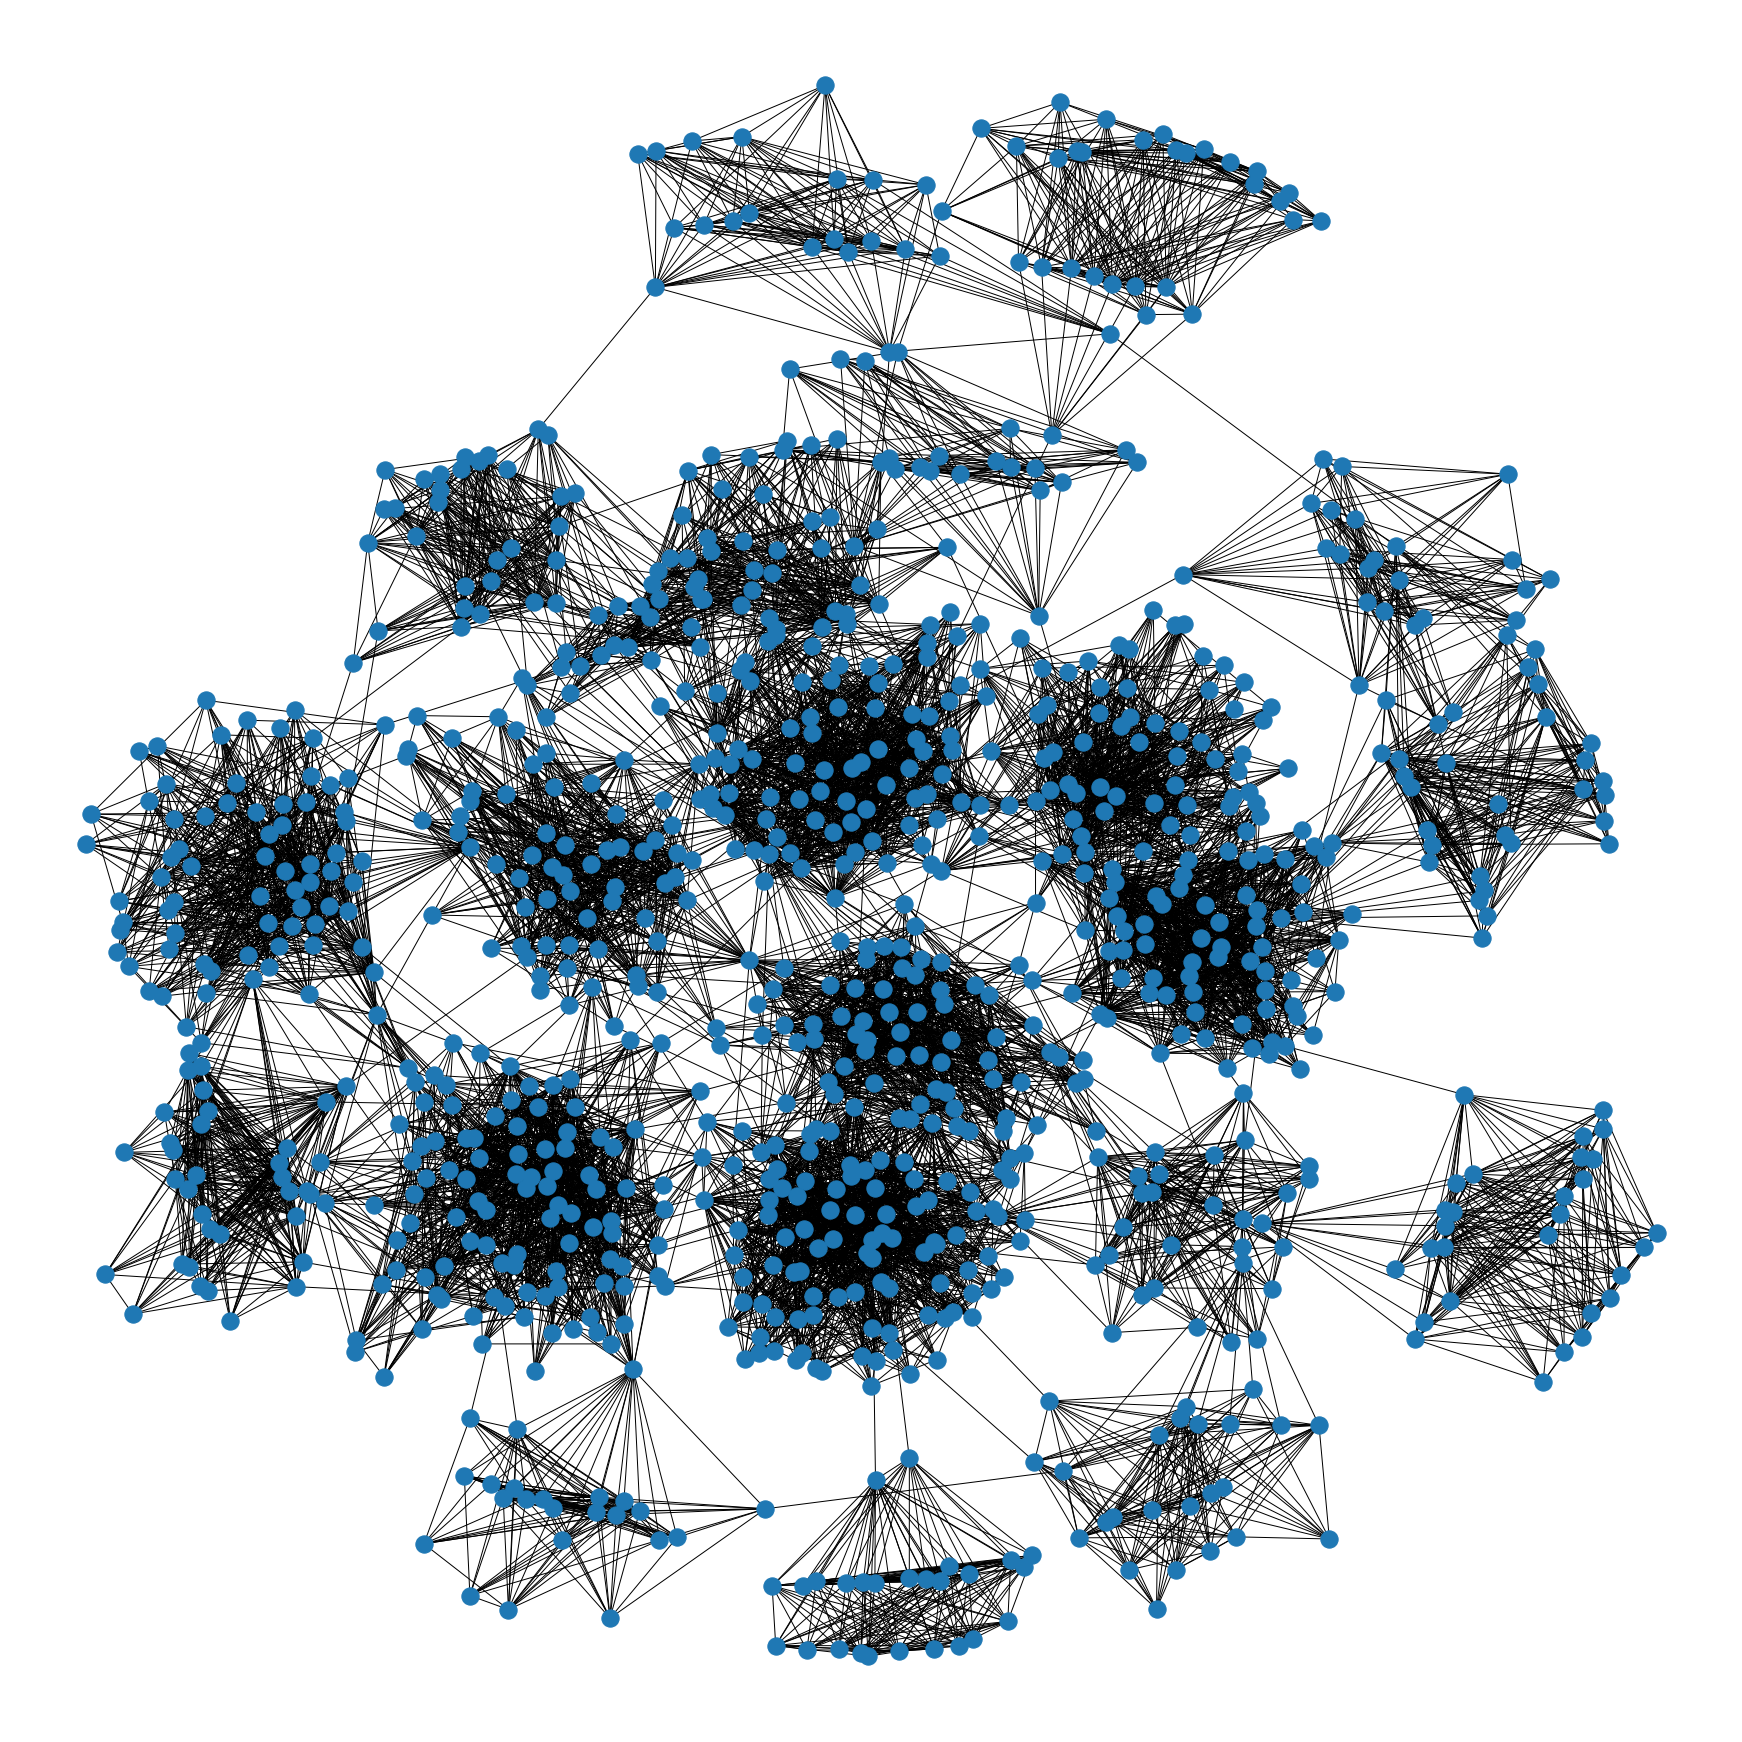

In [3]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G,pos=pos)

In [4]:
k = 2
G2 = planted_partition_graph(k,1000,0.1,0.0001,seed=42)
groundTruth = [(node,data["block"]) for node,data in dict(G2.nodes.data()).items()]

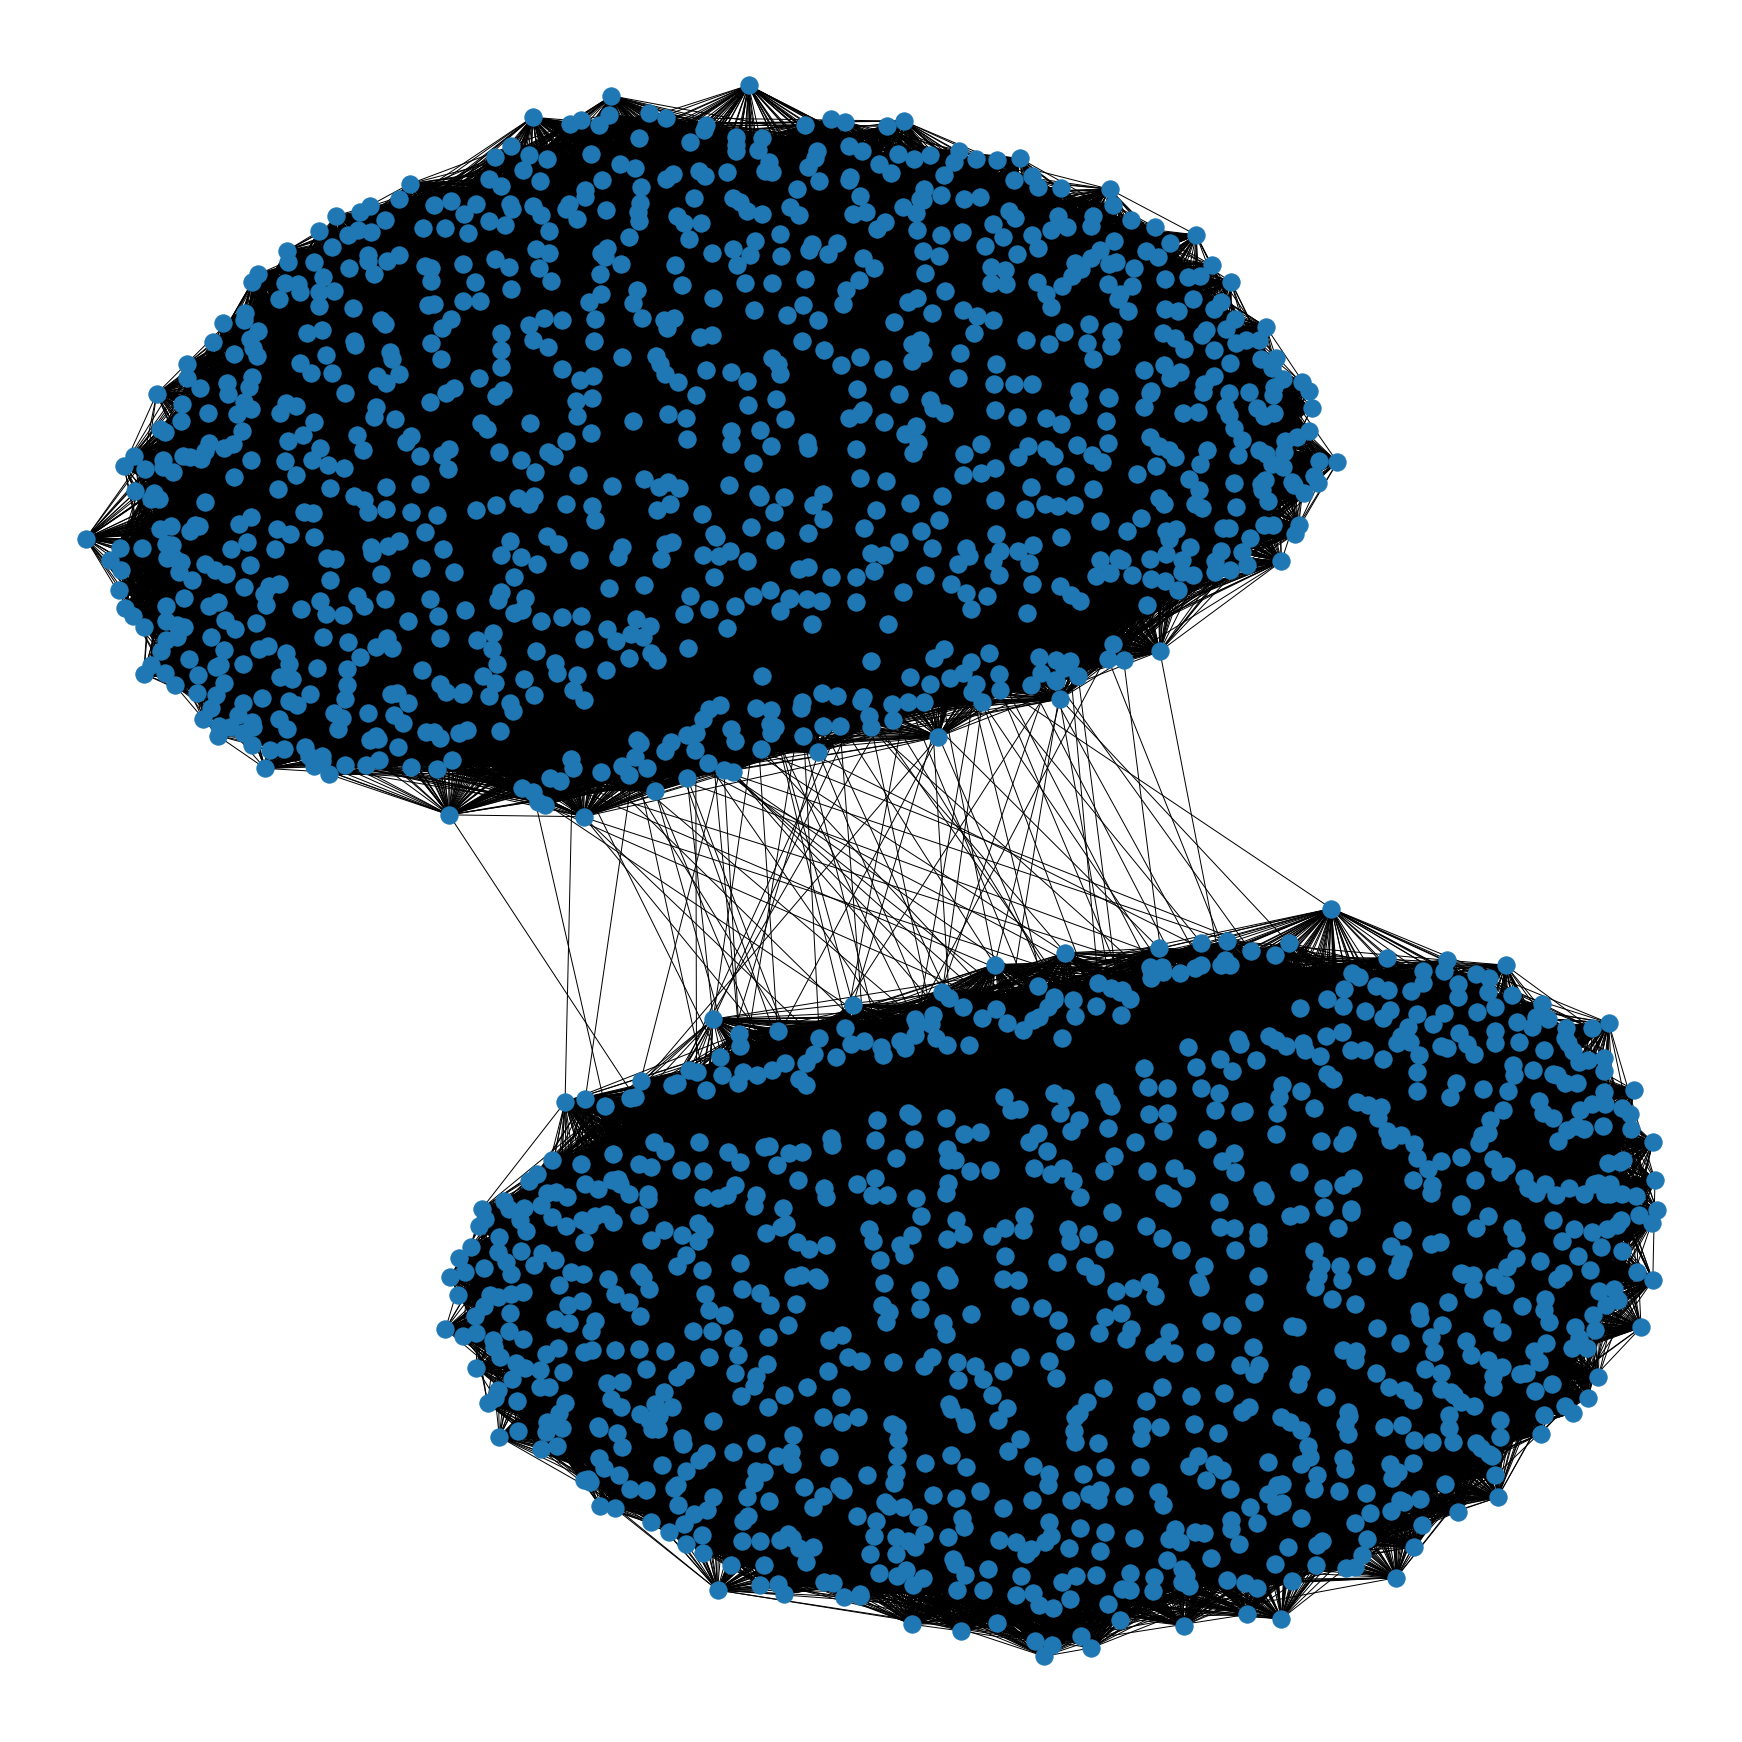

In [5]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos)

In [6]:
def getBelongings(G):
    node_belonging = []
    for node in G.nodes():
        kin = total = 0
        node_community = G.nodes[node]["block"]
        for n in G.neighbors(node):
            total += 1
            if G.nodes[n]["block"] == node_community:
                kin += 1
        node_belonging.append(kin/total)
    return node_belonging

In [7]:
node_belongings = getBelongings(G2)
node_belongings

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.989247311827957,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.989247311827957,
 1.0,
 0.9896907216494846,
 0.9908256880733946,
 1.0,
 1.0,
 1.0,
 1.0,
 0.990909090909091,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9901960784313726,
 1.0,
 1.0,
 1.0,
 0.989010989010989,
 1.0,
 0.991304347826087,
 1.0,
 1.0,
 0.9833333333333333,
 1.0,
 0.991304347826087,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9895833333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9912280701754386,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9897959183673469,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9900990099009901,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9903846153846154,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

# Spectral Clustering

In [8]:
from scipy.sparse.linalg import eigs
L = nx.linalg.laplacianmatrix.laplacian_matrix(G2).toarray()
L = L.astype(np.float32)
vals = vecs = 0
vals, vecs = eigs(L, k=(k+1), which='SM', maxiter=5000)

In [9]:
vecs

array([[-2.2400400e-02+0.j,  2.2360303e-02+0.j, -6.0616736e-04+0.j],
       [-2.2395080e-02+0.j,  2.2360304e-02+0.j,  6.2363288e-05+0.j],
       [-2.2412235e-02+0.j,  2.2360314e-02+0.j, -8.9126137e-05+0.j],
       ...,
       [ 2.2392303e-02+0.j,  2.2361042e-02+0.j, -7.3082522e-03+0.j],
       [ 2.2408985e-02+0.j,  2.2361049e-02+0.j, -3.9537232e-03+0.j],
       [ 2.2407234e-02+0.j,  2.2361033e-02+0.j, -5.9705707e-03+0.j]],
      dtype=complex64)

In [10]:
vals

array([1.8015774e-01+0.j, 5.2228570e-06+0.j, 6.7642113e+01+0.j],
      dtype=complex64)

In [11]:
U = np.delete(vecs,np.argmin(vals),1)

## Com Fuzzy C Means

In [12]:
from fcmeans import FCM
fcm = FCM(n_clusters=k)
fcm.fit(U)

/home/felipe/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'n_clusters = 3, PC = 0.489+0.000j, PEC = 0.030-0.000j')

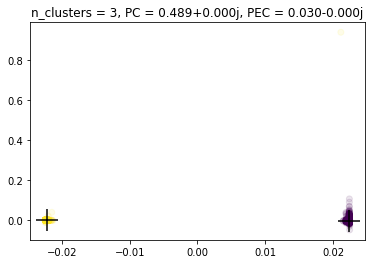

In [13]:
pc = fcm.partition_coefficient
pec = fcm.partition_entropy_coefficient
    
fcm_centers = fcm.centers
fcm_labels = fcm.predict(U)
# plot result
plt.scatter(U[:,0], U[:,1], c=fcm_labels, alpha=.1)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
plt.title(f'n_clusters = 3, PC = {pc:.3f}, PEC = {pec:.3f}')

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

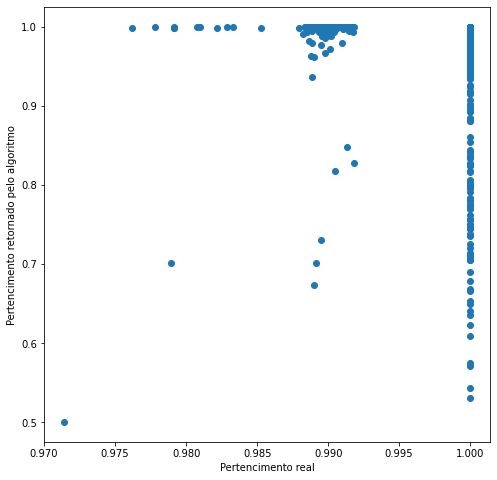

In [14]:
soft_labels = fcm.soft_predict(U)
structure_found = np.max(soft_labels,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

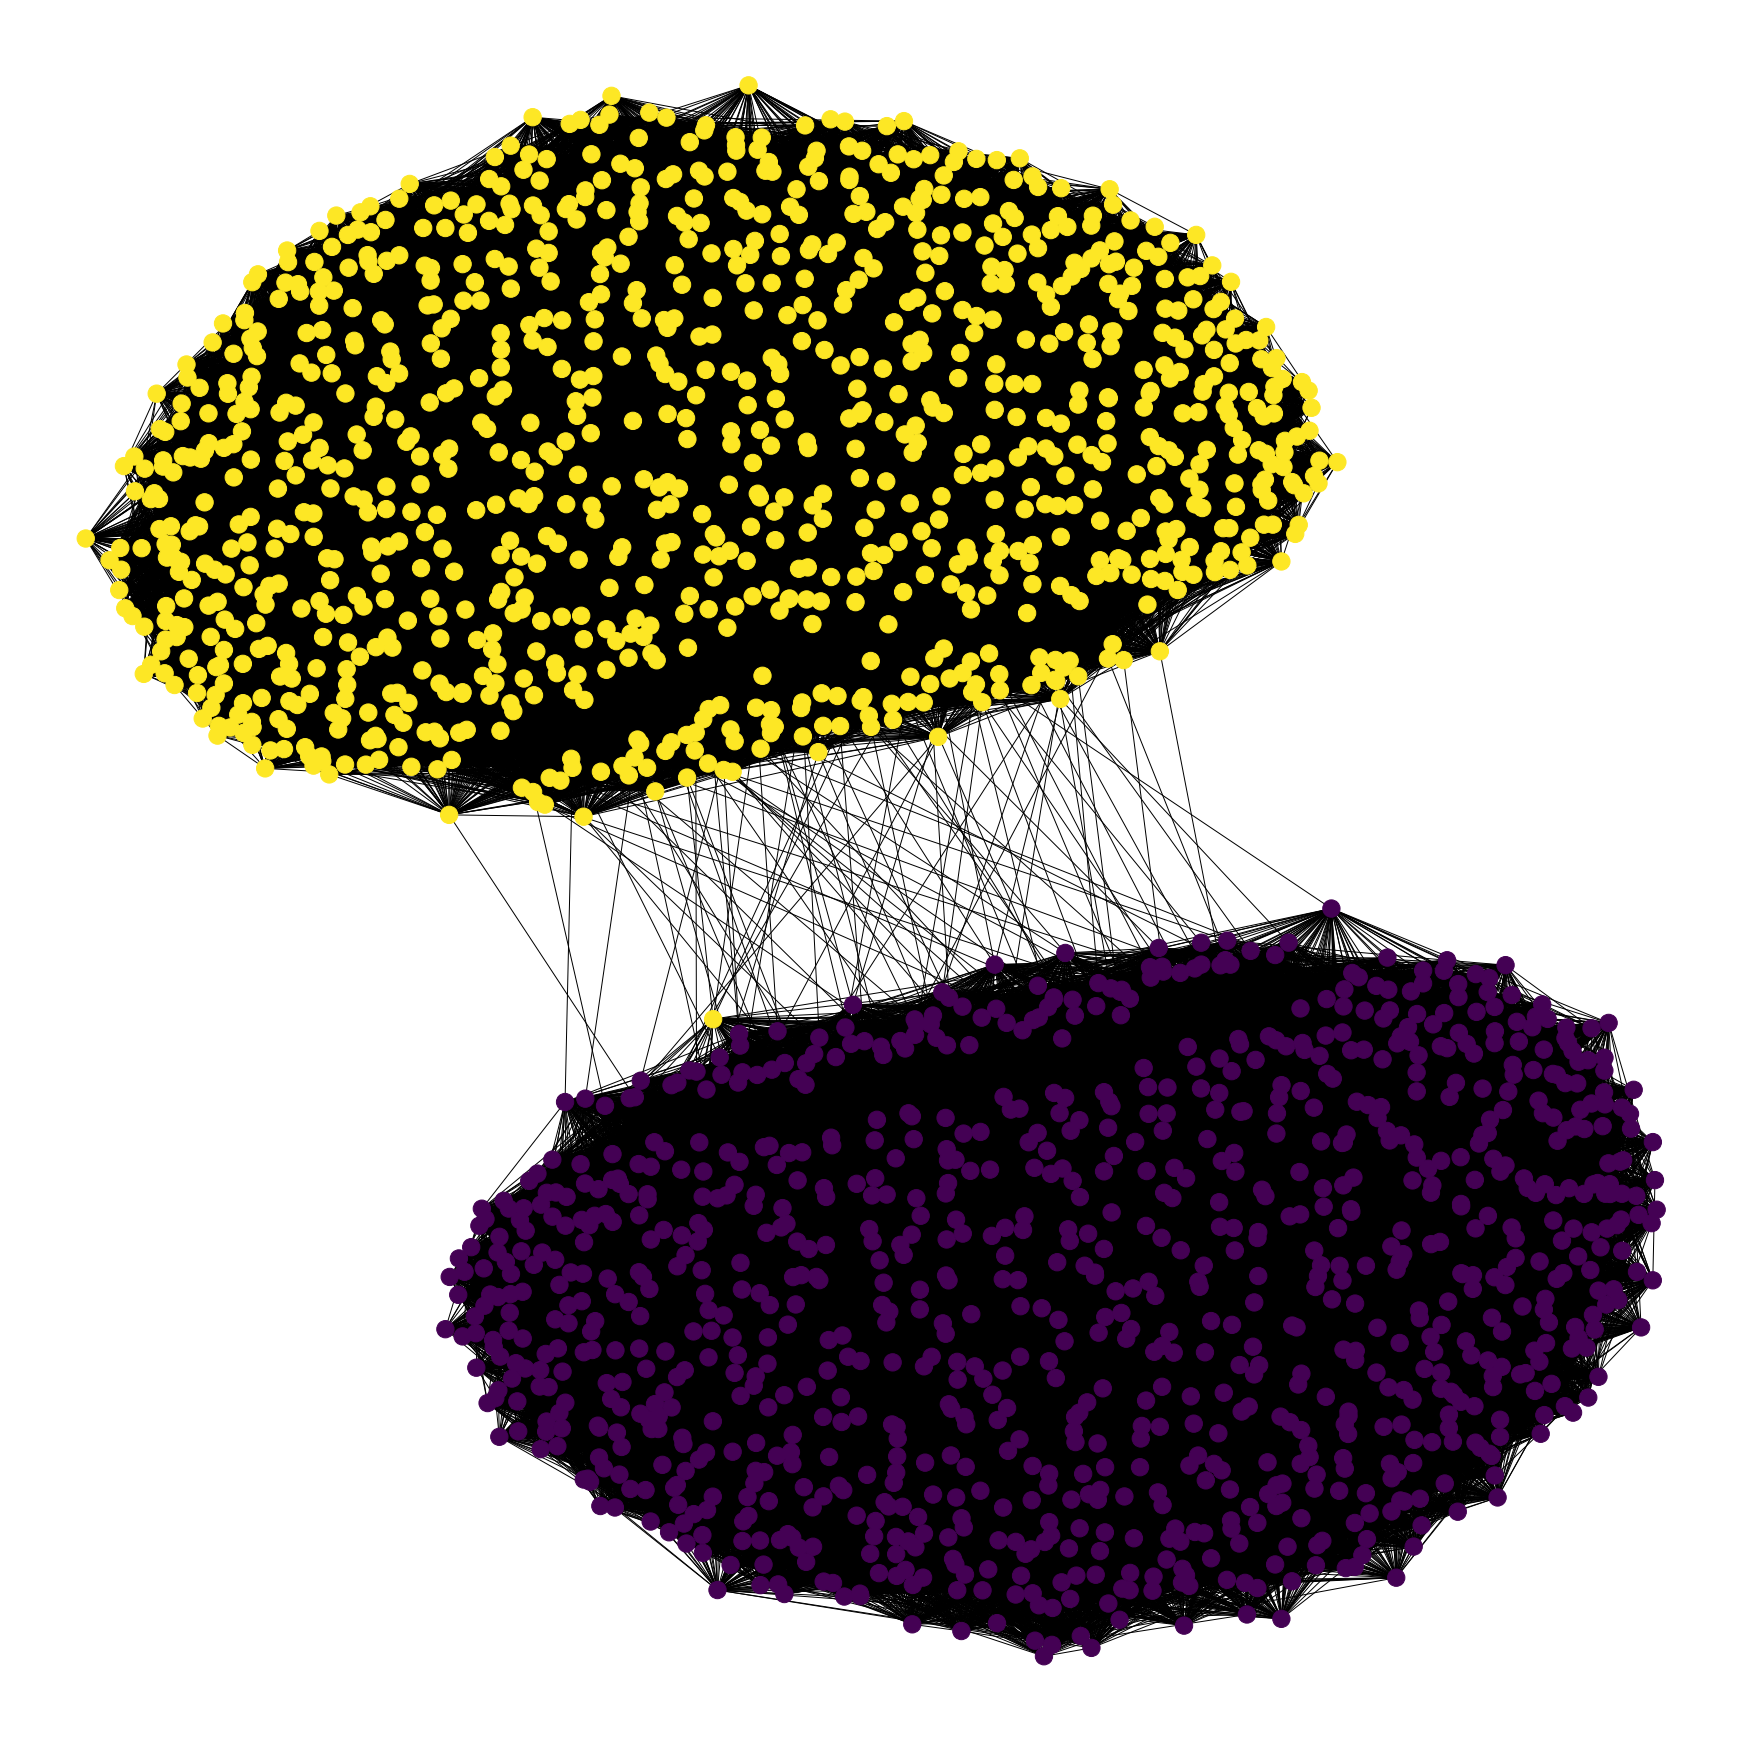

In [15]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos, node_color=np.argmax(soft_labels,axis=1))

## Com GMM

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
model = GaussianMixture(n_components=k,covariance_type='full')

In [18]:
model.fit(U.real)

GaussianMixture(n_components=2)

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

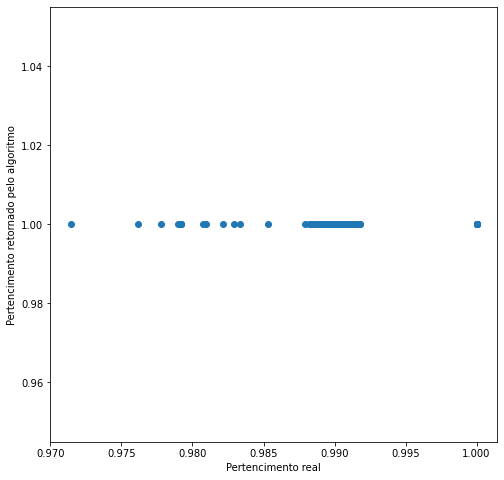

In [19]:
gmm_labels = model.predict_proba(U.real)
structure_found = np.max(gmm_labels,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

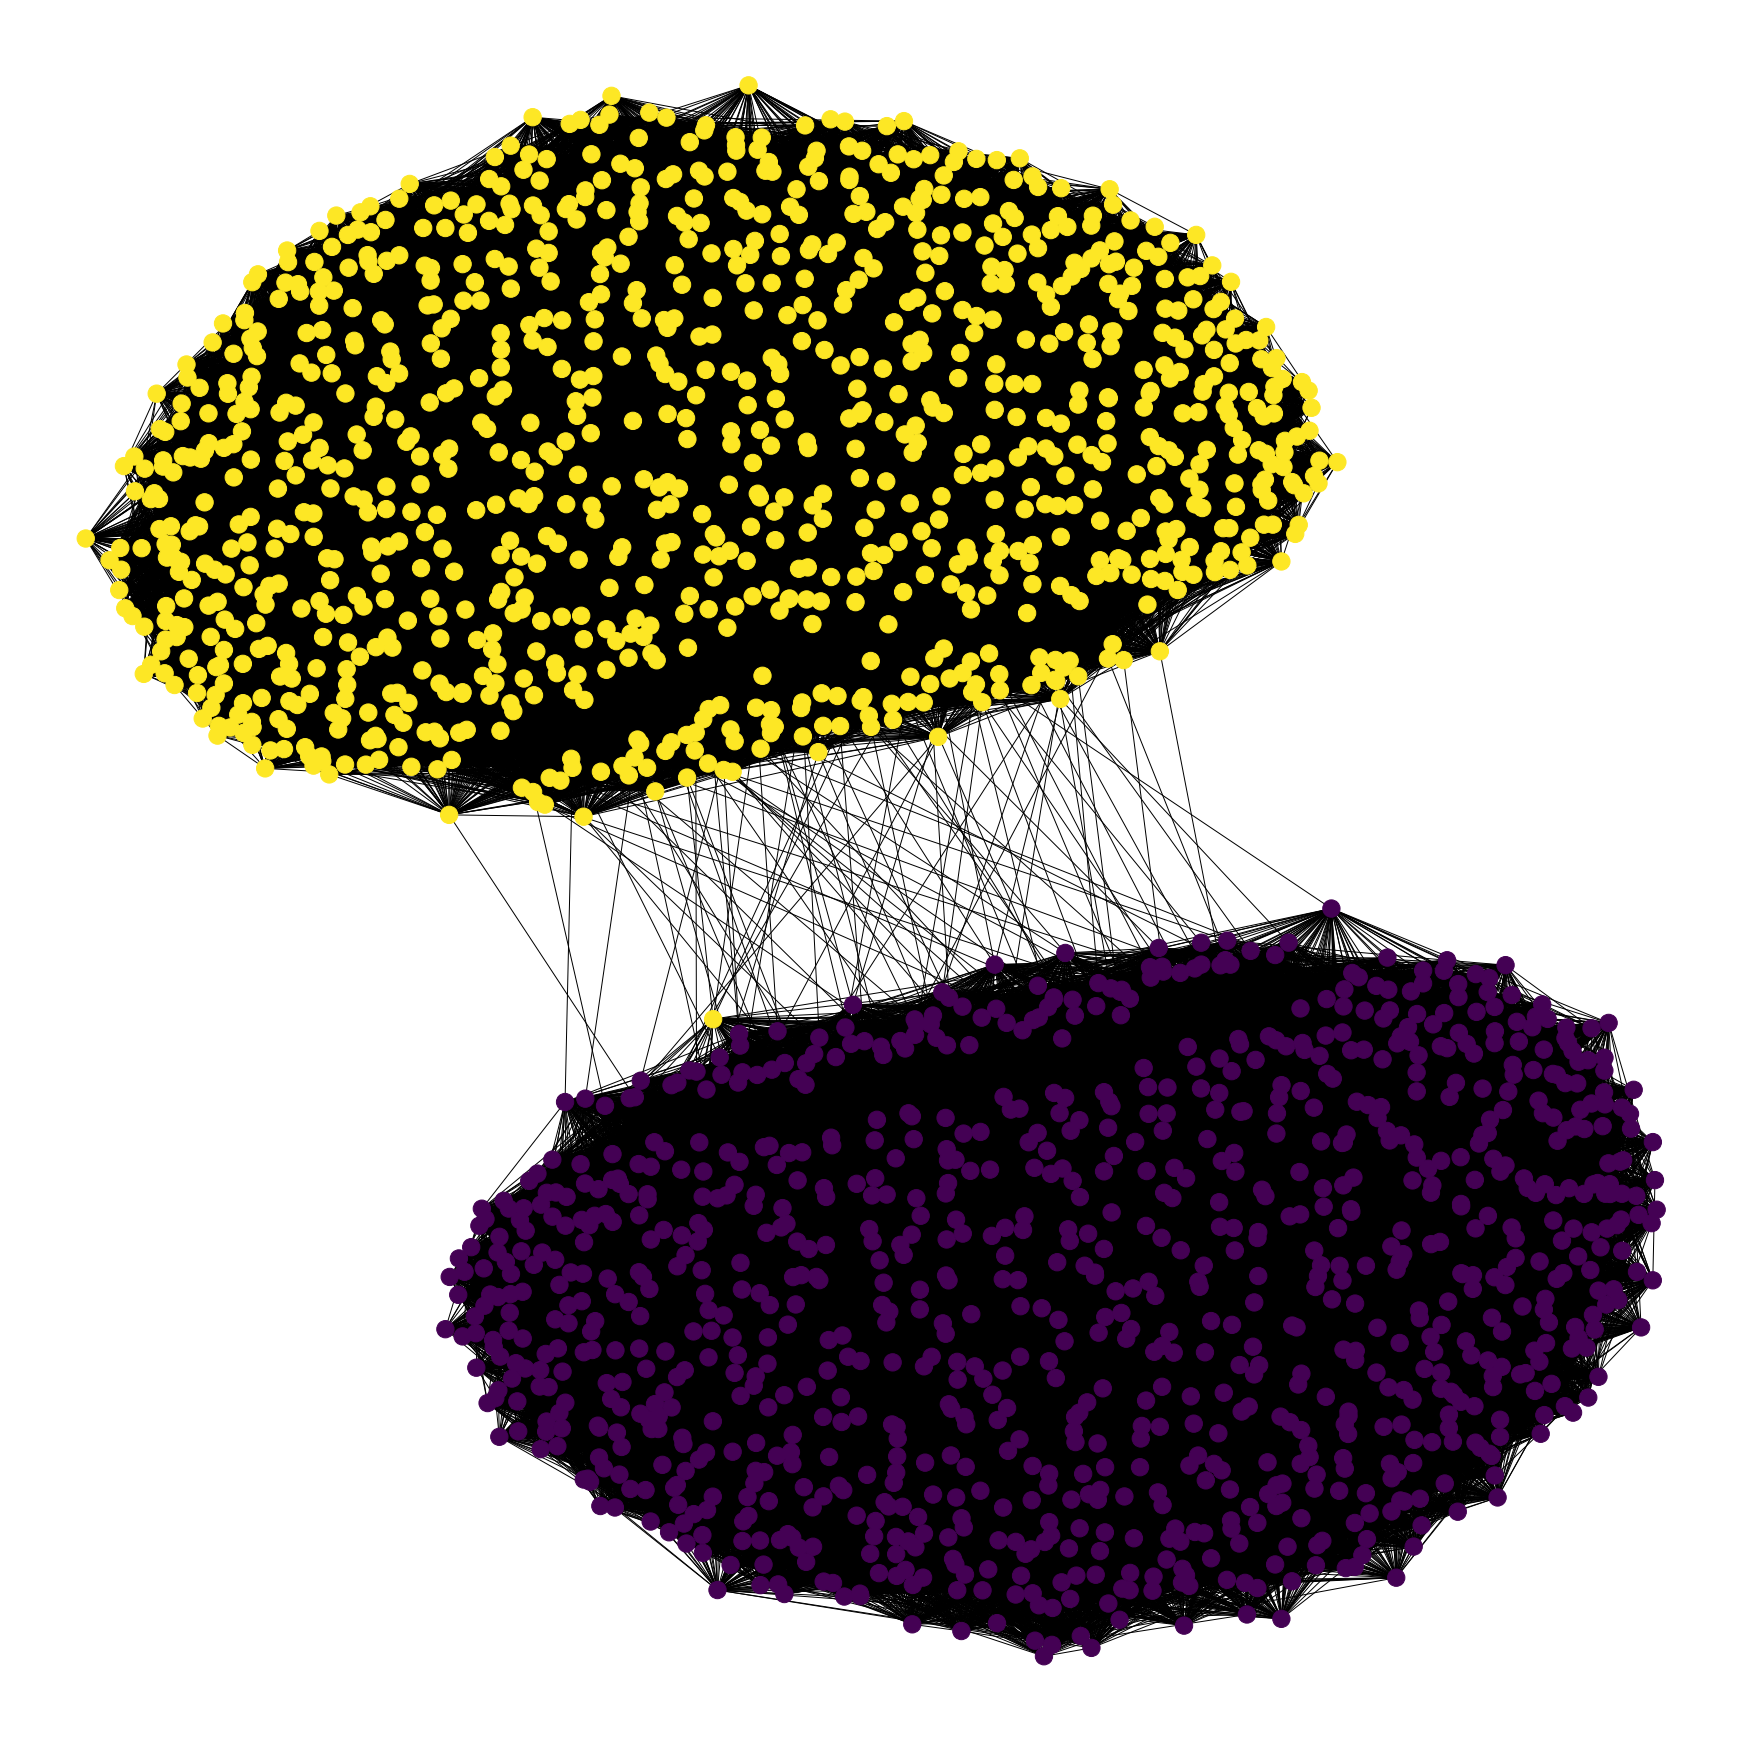

In [20]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos, node_color=np.argmax(gmm_labels,axis=1))

In [21]:
np.bincount(np.argmax(gmm_labels,axis=1))

array([ 999, 1001])

In [22]:
from networkx.algorithms.community import k_clique_communities

In [23]:
G2_c = nx.convert_node_labels_to_integers(G2)

In [33]:
c = list(k_clique_communities(G2_c, 3))
c

[frozenset({0,
            1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            40,
            41,
            42,
            43,
            44,
            45,
            46,
            47,
            48,
            49,
            50,
            51,
            52,
            53,
            54,
            55,
            56,
            57,
            58,
            59,
            60,
            61,
            62,
  

In [41]:
'block' in G2_c.nodes[0]

True

In [42]:
def addCommunityLabels(G,c):
    for i,partition in enumerate(c):
        for node in list(partition):
            if 'labels' in G.nodes[node]:
                G.nodes[node]['labels'].append(i)
            else:
                G.nodes[node]['labels'] = []
                G.nodes[node]['labels'].append(i)

In [53]:
def getKCliqueBelongings(G,c):
    node_belonging = []
    addCommunityLabels(G,c)
    for node in G.nodes():
        neighborhood_sum = {}
        kmax = total = 0
        for label in G.nodes[node]["labels"]:
            neighborhood_sum[label] = 0
        for n in G.neighbors(node):
            for label in G.nodes[n]["labels"]:
                if label in neighborhood_sum.keys():
                    neighborhood_sum[label] += 1
                else:
                    neighborhood_sum[label] = 1
                total += 1
        for label,count in neighborhood_sum.items():
            if kmax < count and label in  G.nodes[node]["labels"]:
                kmax = count
        node_belonging.append(kmax/total)
    return node_belonging

In [54]:
structure_found =  getKCliqueBelongings(G2,c)

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

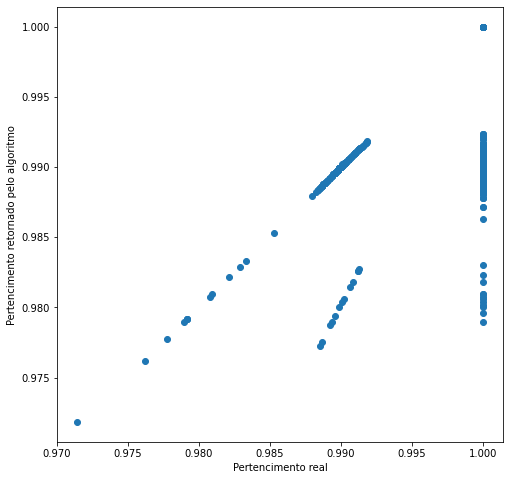

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")